In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import data_preprocessing_utilities as dp
import data_eda_utilities as de

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df_storm = pd.read_csv("../Data/StormEvents_details-ftp_v1.0_d2020_c20240620.csv")
dp.print_head(df_storm)

   BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  END_TIME  \
0           202006         24        1620         202006       24      1620   
1           202006         20        1930         202006       20      1930   
2           202006          3        1550         202006        3      1550   
3           202006         19        1900         202006       19      1900   
4           202006         20        1900         202006       20      1900   

   EPISODE_ID  EVENT_ID    STATE  STATE_FIPS  YEAR MONTH_NAME  \
0      149684    902190  GEORGIA          13  2020       June   
1      149048    898391   KANSAS          20  2020       June   
2      149149    899120   KANSAS          20  2020       June   
3      149046    898383   KANSAS          20  2020       June   
4      149048    898388   KANSAS          20  2020       June   

          EVENT_TYPE CZ_TYPE  CZ_FIPS   CZ_NAME  WFO     BEGIN_DATE_TIME  \
0  Thunderstorm Wind       C      321     WORTH  TAE  24-J

In [4]:
dp.print_shape(df_storm)

No of rows = 61279 , No of columns = 51


In [5]:
dp.print_null_count(df_storm)

BEGIN_YEARMONTH           0
BEGIN_DAY                 0
BEGIN_TIME                0
END_YEARMONTH             0
END_DAY                   0
END_TIME                  0
EPISODE_ID                0
EVENT_ID                  0
STATE                     0
STATE_FIPS                0
YEAR                      0
MONTH_NAME                0
EVENT_TYPE                0
CZ_TYPE                   0
CZ_FIPS                   0
CZ_NAME                   0
WFO                       0
BEGIN_DATE_TIME           0
CZ_TIMEZONE               0
END_DATE_TIME             0
INJURIES_DIRECT           0
INJURIES_INDIRECT         0
DEATHS_DIRECT             0
DEATHS_INDIRECT           0
DAMAGE_PROPERTY       12862
DAMAGE_CROPS          12109
SOURCE                    0
MAGNITUDE             26418
MAGNITUDE_TYPE        34113
FLOOD_CAUSE           54914
CATEGORY              61216
TOR_F_SCALE           60028
TOR_LENGTH            60028
TOR_WIDTH             60028
TOR_OTHER_WFO         61113
TOR_OTHER_CZ_STATE  

In [6]:
dp.print_dtypes(df_storm)

BEGIN_YEARMONTH         int64
BEGIN_DAY               int64
BEGIN_TIME              int64
END_YEARMONTH           int64
END_DAY                 int64
END_TIME                int64
EPISODE_ID              int64
EVENT_ID                int64
STATE                  object
STATE_FIPS              int64
YEAR                    int64
MONTH_NAME             object
EVENT_TYPE             object
CZ_TYPE                object
CZ_FIPS                 int64
CZ_NAME                object
WFO                    object
BEGIN_DATE_TIME        object
CZ_TIMEZONE            object
END_DATE_TIME          object
INJURIES_DIRECT         int64
INJURIES_INDIRECT       int64
DEATHS_DIRECT           int64
DEATHS_INDIRECT         int64
DAMAGE_PROPERTY        object
DAMAGE_CROPS           object
SOURCE                 object
MAGNITUDE             float64
MAGNITUDE_TYPE         object
FLOOD_CAUSE            object
CATEGORY              float64
TOR_F_SCALE            object
TOR_LENGTH            float64
TOR_WIDTH 

In [7]:
df_storm = df_storm[['BEGIN_DATE_TIME', 'END_DATE_TIME', 'STATE', 'EVENT_TYPE', 'MAGNITUDE',
                    'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT']]

df_storm['MAGNITUDE'] = df_storm['MAGNITUDE'].fillna(df_storm['MAGNITUDE'].mean())
df_storm['BEGIN_DATE_TIME'] = pd.to_datetime(df_storm['BEGIN_DATE_TIME'])
df_storm['END_DATE_TIME'] = pd.to_datetime(df_storm['END_DATE_TIME'])

/var/folders/vd/dmj076xx2t38kz00wdhlwgqh0000gn/T/ipykernel_91654/3250694810.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_storm['BEGIN_DATE_TIME'] = pd.to_datetime(df_storm['BEGIN_DATE_TIME'])
/var/folders/vd/dmj076xx2t38kz00wdhlwgqh0000gn/T/ipykernel_91654/3250694810.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_storm['END_DATE_TIME'] = pd.to_datetime(df_storm['END_DATE_TIME'])


In [8]:
dp.print_shape(df_storm)

No of rows = 61279 , No of columns = 9


In [9]:
df_storm.select_dtypes(include='number').columns

Index(['MAGNITUDE', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT'],
      dtype='object')

In [10]:
dp.summarize_data(df_storm,
columns=['BEGIN_DATE_TIME', 'END_DATE_TIME'],
stats=['min', 'max', 'range'])

dp.summarize_data(df_storm,
columns=['MAGNITUDE', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT'],
stats=['mean', 'median', 'std', 'IQR', 'range', 'min', 'max'])

*********** Dataset summary of numerical columns ***********
                                min                 max             range
BEGIN_DATE_TIME 2020-01-01 00:00:00 2020-12-31 22:30:00 365 days 22:30:00
END_DATE_TIME   2020-01-01 00:15:00 2020-12-31 23:59:00 365 days 23:44:00
*********** Dataset summary of numerical columns ***********
                    min    max   range       mean     median        std  \
MAGNITUDE          0.13  126.0  125.87  40.555808  40.555808  16.717253   
INJURIES_DIRECT    0.00  170.0  170.00   0.023271   0.000000   1.111456   
INJURIES_INDIRECT  0.00  100.0  100.00   0.006071   0.000000   0.443368   
DEATHS_DIRECT      0.00   43.0   43.00   0.012337   0.000000   0.328252   
DEATHS_INDIRECT    0.00   12.0   12.00   0.002301   0.000000   0.078818   

                        IQR  
MAGNITUDE          9.444192  
INJURIES_DIRECT    0.000000  
INJURIES_INDIRECT  0.000000  
DEATHS_DIRECT      0.000000  
DEATHS_INDIRECT    0.000000  


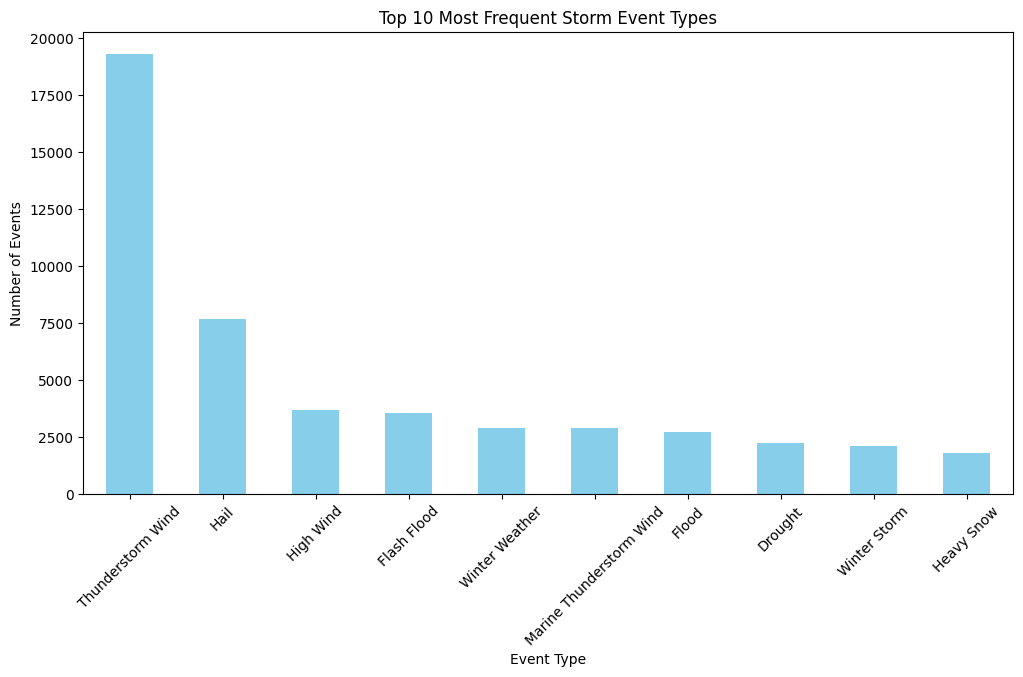

In [11]:
# Visualisations
plt.figure(figsize=(12,6))
df_storm['EVENT_TYPE'].value_counts().nlargest(10).plot(kind='bar', color='skyblue')
plt.xlabel("Event Type")
plt.ylabel("Number of Events")
plt.title("Top 10 Most Frequent Storm Event Types")
plt.xticks(rotation=45)
plt.show()

# Thunderstorm Wind is by far the most common storm event, followed by Hail and High Wind, indicating that severe winds are the predominant weather hazard.

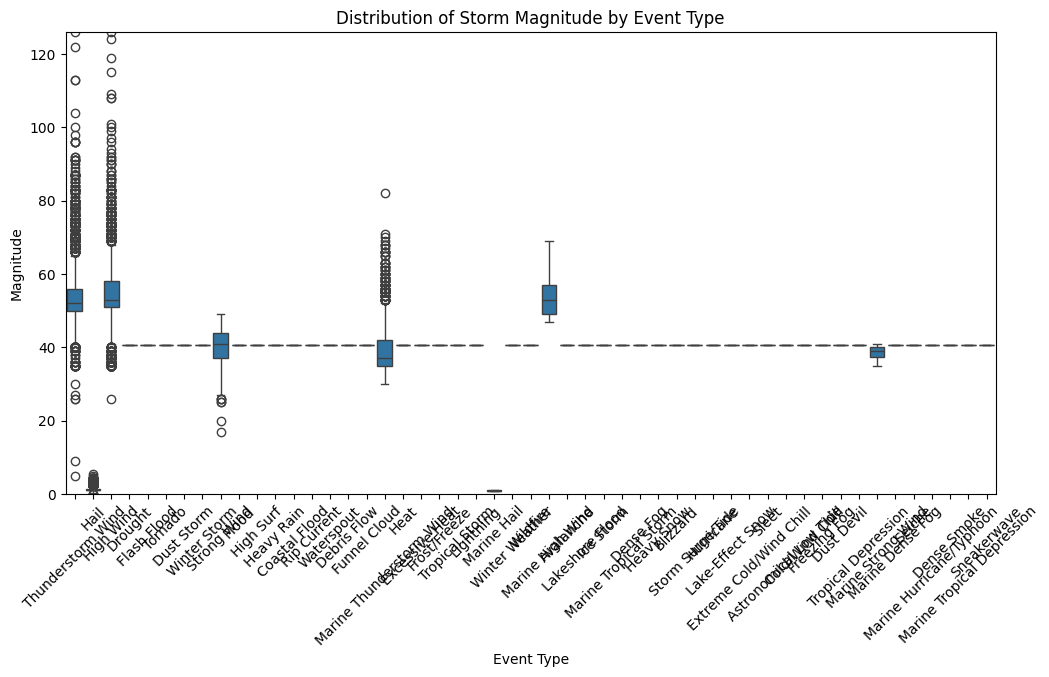

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_storm, x='EVENT_TYPE', y='MAGNITUDE')
plt.xlabel("Event Type")
plt.ylabel("Magnitude")
plt.title("Distribution of Storm Magnitude by Event Type")
plt.xticks(rotation=45)
plt.ylim(0, df_storm['MAGNITUDE'].max())
plt.show()

# Storm magnitudes vary significantly across event types, with some events exhibiting extreme outliers, suggesting that certain storms can be exceptionally severe compared to others.

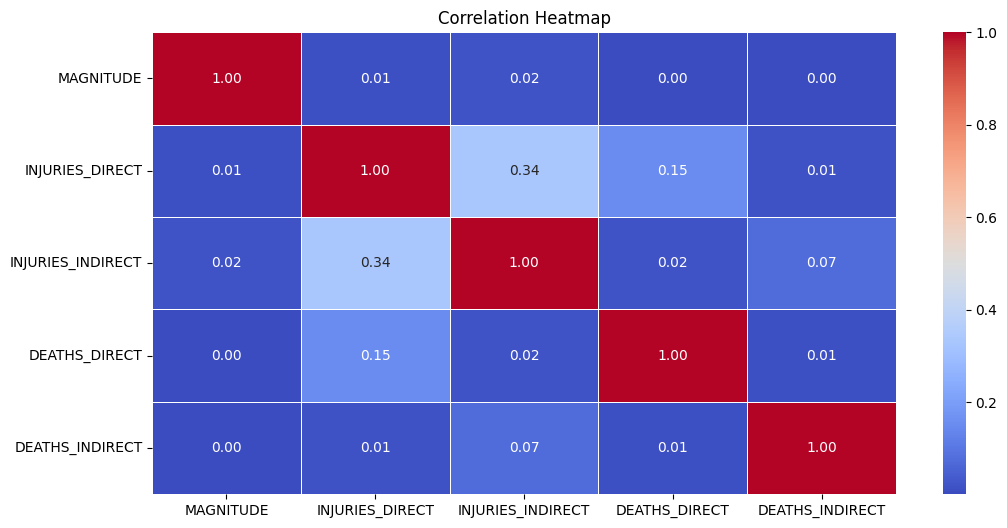

In [13]:
de.draw_correlation_heatmap(df_storm)

Skewness:
 MAGNITUDE             -1.251438
INJURIES_DIRECT       98.731906
INJURIES_INDIRECT    191.999633
DEATHS_DIRECT         74.735234
DEATHS_INDIRECT       79.204216
dtype: float64


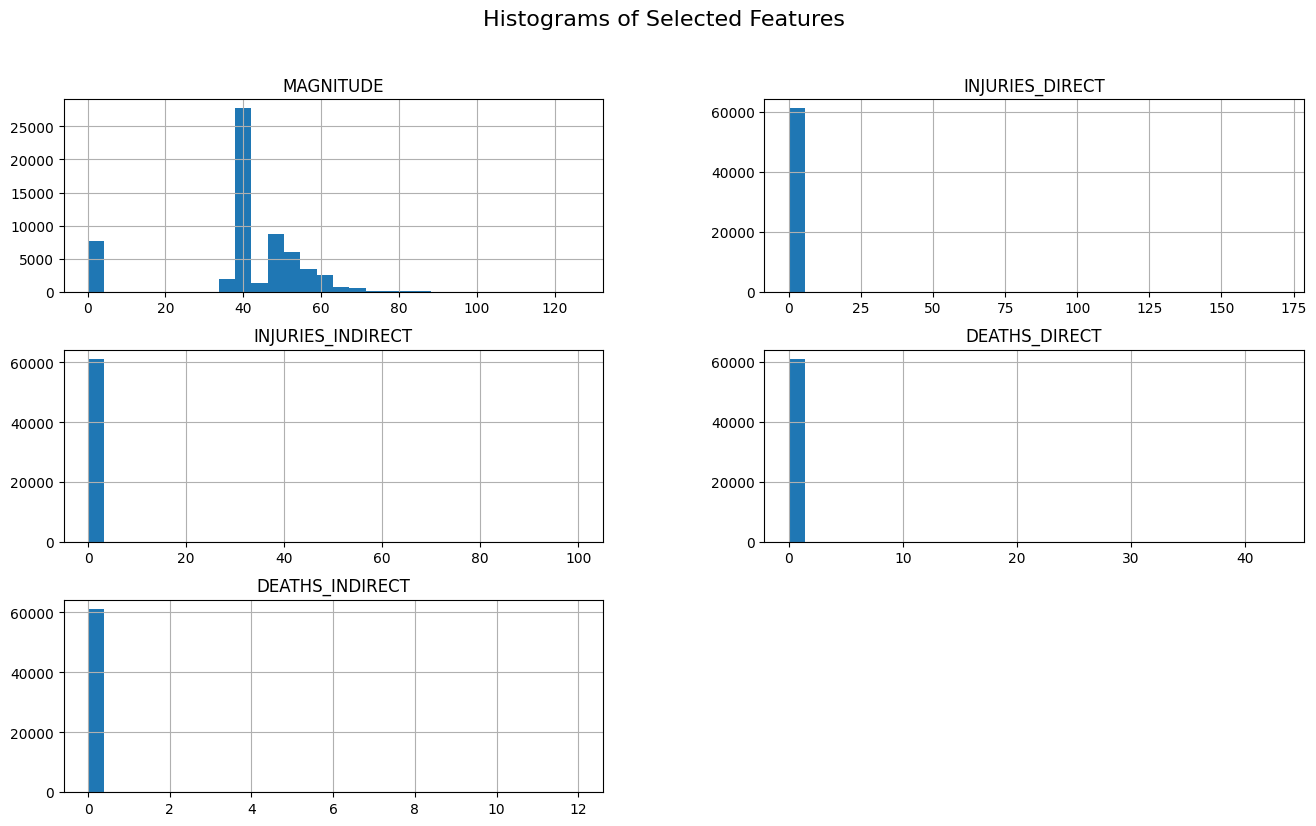

In [14]:
selected_cols = ['MAGNITUDE', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT']
de.draw_skewness_histogram(df_storm, selected_cols=selected_cols)

In [15]:
num_cols = ['MAGNITUDE', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT']

de.print_outliers(df_storm, num_cols=num_cols)

df_storm = de.cap_outliers(df_storm, 'MAGNITUDE')
df_storm = de.remove_outliers(df_storm, 'INJURIES_DIRECT')
df_storm = de.remove_outliers(df_storm, 'INJURIES_INDIRECT')
df_storm = de.remove_outliers(df_storm, 'DEATHS_DIRECT')
df_storm = de.remove_outliers(df_storm, 'DEATHS_INDIRECT')

print()

de.print_outliers(df_storm, num_cols=num_cols)

MAGNITUDE: 9434 outliers detected (15.4%)
INJURIES_DIRECT: 286 outliers detected (0.47%)
INJURIES_INDIRECT: 94 outliers detected (0.15%)
DEATHS_DIRECT: 375 outliers detected (0.61%)
DEATHS_INDIRECT: 97 outliers detected (0.16%)

MAGNITUDE: 0 outliers detected (0.0%)
INJURIES_DIRECT: 0 outliers detected (0.0%)
INJURIES_INDIRECT: 0 outliers detected (0.0%)
DEATHS_DIRECT: 0 outliers detected (0.0%)
DEATHS_INDIRECT: 0 outliers detected (0.0%)


In [16]:
num_cols = ['MAGNITUDE', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT']
df_storm[num_cols] = de.scale_df(df_storm, selected_columns=num_cols, type='scalar')

In [17]:
df_storm.to_csv("../Data/StormEvents_details-ftp_v1.0_d2020_c20240620.csv")